In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from keras import models
from keras import layers
from keras import metrics

In [ ]:
(x_train, y_train) , (x_test, y_test) = tf.keras.datasets.boston_housing.load_data(test_split=0.2, seed=113)

In [ ]:
print(f'Training data : {x_train.shape}')
print(f'Test data : {x_test.shape}')
print(f'Training sample : {x_train[0]}')
print(f'Training target sample : {y_train[0]}')

Training data : (404, 13)
Test data : (102, 13)
Training sample : [  1.23247   0.        8.14      0.        0.538     6.142    91.7
   3.9769    4.      307.       21.      396.9      18.72   ]
Training target sample : 15.2


In [ ]:
x_train

array([[1.23247e+00, 0.00000e+00, 8.14000e+00, ..., 2.10000e+01,
        3.96900e+02, 1.87200e+01],
       [2.17700e-02, 8.25000e+01, 2.03000e+00, ..., 1.47000e+01,
        3.95380e+02, 3.11000e+00],
       [4.89822e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        3.75520e+02, 3.26000e+00],
       ...,
       [3.46600e-02, 3.50000e+01, 6.06000e+00, ..., 1.69000e+01,
        3.62250e+02, 7.83000e+00],
       [2.14918e+00, 0.00000e+00, 1.95800e+01, ..., 1.47000e+01,
        2.61950e+02, 1.57900e+01],
       [1.43900e-02, 6.00000e+01, 2.93000e+00, ..., 1.56000e+01,
        3.76700e+02, 4.38000e+00]])

In [ ]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
mms.fit(x_train)
x_train= mms.transform(x_train)
x_test = mms.transform(x_test)


In [ ]:
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(100, activation='relu', input_shape=(x_train.shape[1],)))
    model.add(layers.Dense(100, activation='relu'))
    model.add(layers.Dense(1, activation='linear'))

    model.compile(optimizer='rmsprop',
              loss='mse',
              metrics=['mae'])
    return model

Epoch 1/500
13/13 [==============================] - 1s 20ms/step - loss: 527.1647 - mae: 20.9228 - val_loss: 471.7950 - val_mae: 19.5118
Epoch 2/500
13/13 [==============================] - 0s 7ms/step - loss: 378.6624 - mae: 16.8498 - val_loss: 314.9732 - val_mae: 15.0827
Epoch 3/500
13/13 [==============================] - 0s 6ms/step - loss: 240.1873 - mae: 12.3707 - val_loss: 195.6383 - val_mae: 11.2940
Epoch 4/500
13/13 [==============================] - 0s 7ms/step - loss: 154.6302 - mae: 9.5813 - val_loss: 142.3809 - val_mae: 9.3051
Epoch 5/500
13/13 [==============================] - 0s 7ms/step - loss: 121.2121 - mae: 8.4352 - val_loss: 118.4138 - val_mae: 8.3042
Epoch 6/500
13/13 [==============================] - 0s 6ms/step - loss: 102.2955 - mae: 7.6249 - val_loss: 101.4513 - val_mae: 7.5249
Epoch 7/500
13/13 [==============================] - 0s 6ms/step - loss: 86.1866 - mae: 6.8999 - val_loss: 85.0752 - val_mae: 6.7695
Epoch 8/500
13/13 [==============================]

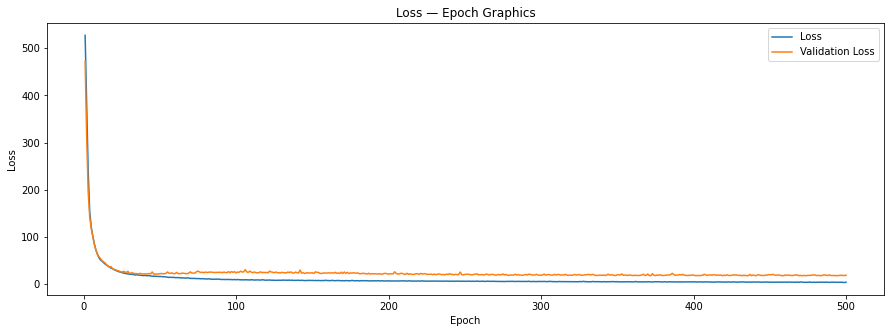

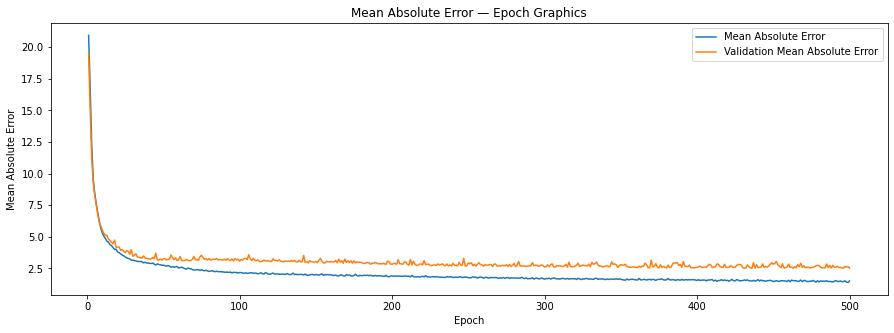

In [ ]:
model = build_model()
history = model.fit(x_train, y_train,batch_size=32, epochs=500, validation_data=(x_test,y_test))
figure = plt.gcf()
figure.set_size_inches((15, 5))
plt.title('Loss — Epoch Graphics')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(range(1, len(history.history['loss']) + 1), history.history['loss'])
plt.plot(range(1, len(history.history['val_loss']) + 1), history.history['val_loss'])
plt.legend(['Loss', 'Validation Loss'])
plt.show()
figure = plt.gcf()
figure.set_size_inches((15, 5))
plt.title('Mean Absolute Error — Epoch Graphics')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.plot(range(1, len(history.history['mae']) + 1), history.history['mae'])
plt.plot(range(1, len(history.history['val_mae']) + 1), history.history['val_mae'])
plt.legend(['Mean Absolute Error', 'Validation Mean Absolute Error'])
plt.show()

In [ ]:
test_mse_score, test_mae_score = model.evaluate(x_test, y_test)
print(test_mse_score)
print(test_mae_score)

4/4 [==============================] - 0s 4ms/step - loss: 18.7888 - mae: 2.5263
18.788827896118164
2.526334524154663


In [ ]:
y_pred = model.predict(x_test.reshape((102,13)))

4/4 [==============================] - 0s 4ms/step


In [ ]:
print(y_pred)

[[10.07648 ]
 [18.734182]
 [21.43784 ]
 [31.436304]
 [24.513968]
 [22.60665 ]
 [27.886265]
 [22.50212 ]
 [19.452848]
 [21.012203]
 [16.51061 ]
 [16.68516 ]
 [16.702896]
 [46.182495]
 [16.967548]
 [21.143412]
 [25.033497]
 [20.992384]
 [18.7928  ]
 [20.557274]
 [12.419824]
 [14.141075]
 [21.482067]
 [16.085947]
 [18.536379]
 [22.224964]
 [29.758242]
 [26.672808]
 [11.970065]
 [21.244776]
 [20.682549]
 [14.337502]
 [32.397587]
 [23.964417]
 [16.367296]
 [ 9.631833]
 [15.613296]
 [18.553495]
 [17.864355]
 [24.704514]
 [27.487839]
 [26.152975]
 [14.370187]
 [43.591537]
 [29.793266]
 [28.774258]
 [28.711689]
 [18.178654]
 [21.862583]
 [22.587261]
 [32.545204]
 [19.55207 ]
 [11.693366]
 [15.093878]
 [35.582527]
 [28.296011]
 [12.416285]
 [48.149475]
 [32.10366 ]
 [24.301512]
 [24.426855]
 [16.399645]
 [16.191107]
 [20.881554]
 [23.4414  ]
 [20.684492]
 [14.178438]
 [21.614702]
 [14.136851]
 [ 8.958969]
 [21.018276]
 [27.795542]
 [21.926159]
 [14.322531]
 [25.11953 ]
 [19.053955]
 [20.621218]

In [ ]:
print(y_test)

[ 7.2 18.8 19.  27.  22.2 24.5 31.2 22.9 20.5 23.2 18.6 14.5 17.8 50.
 20.8 24.3 24.2 19.8 19.1 22.7 12.  10.2 20.  18.5 20.9 23.  27.5 30.1
  9.5 22.  21.2 14.1 33.1 23.4 20.1  7.4 15.4 23.8 20.1 24.5 33.  28.4
 14.1 46.7 32.5 29.6 28.4 19.8 20.2 25.  35.4 20.3  9.7 14.5 34.9 26.6
  7.2 50.  32.4 21.6 29.8 13.1 27.5 21.2 23.1 21.9 13.  23.2  8.1  5.6
 21.7 29.6 19.6  7.  26.4 18.9 20.9 28.1 35.4 10.2 24.3 43.1 17.6 15.4
 16.2 27.1 21.4 21.5 22.4 25.  16.6 18.6 22.  42.8 35.1 21.5 36.  21.9
 24.1 50.  26.7 25. ]


In [ ]:
predict_data = np.array([0.63796, 0.00, 8.140, 0, 0.5380, 6.0960, 84.50, 4.4619, 4, 307.0, 21.00, 380.02, 10.26])
#actual = 18.20
predict_data = mms.transform(predict_data.reshape(1, -1))
predict_result = model.predict(predict_data)
print(f'Predicted result: {predict_result[0, 0]}')

1/1 [==============================] - 0s 26ms/step
Predicted result: 18.461936950683594
